In [ ]:
!pip install tensorflow-io
!pip install tensorflow-datasets


     |████████████████████████████████| 22.7MB 132kB/s 
     |████████████████████████████████| 2.3MB 41.2MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn
import tensorflow_io as tfio
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datasdawdwadaf = h5py.File('/content/drive/MyDrive/highlevel/test_pile_5000000.h5', 'r')
dadad = pd.DataFrame(np.array(datasdawdwadaf['features']))
datasdawdwadaf.visititems
dadad

,0,1,2,3,4,5
0,45.218601,0.018291,0.004248,0.32245,0.327634,0.041526
1,76.449600,0.297857,0.182354,2.93684,3.069760,0.525314
2,109.003998,0.368083,0.413334,3.21214,4.841000,0.465829
3,1.443220,0.000000,0.000000,0.00000,0.000000,0.000000
4,77.773804,0.236585,0.095028,2.60919,1.614730,0.454011
...,...,...,...,...,...,...
4999995,85.821602,0.124378,0.039516,1.00741,0.826471,0.281355
4999996,120.991997,0.357036,0.335816,1.65357,2.365450,0.487707
4999997,145.895004,0.201805,0.102891,1.13028,0.803343,0.262889
4999998,89.709602,0.170860,0.060632,1.45797,1.152210,0.461681


In [ ]:
test_hl = tfio.IODataset.from_hdf5('/content/drive/MyDrive/highlevel/test_pile_5000000.h5', dataset='/features')
test_targets_hl = tfio.IODataset.from_hdf5('/content/drive/MyDrive/highlevel/test_pile_5000000.h5', dataset='/targets', spec=tf.int64)

train_hl = tfio.IODataset.from_hdf5('/content/drive/MyDrive/highlevel/train_pile_10000000.h5', dataset='/features')
train_targets_hl = tfio.IODataset.from_hdf5('/content/drive/MyDrive/highlevel/train_pile_10000000.h5', dataset='/targets', spec=tf.int64)


In [ ]:
test_hl = tf.data.Dataset.zip((test_hl, test_targets_hl)).prefetch(tf.data.experimental.AUTOTUNE).batch(500000)
data_hl = tf.data.Dataset.zip((train_hl, train_targets_hl)).prefetch(tf.data.experimental.AUTOTUNE).batch(1000000)

In [ ]:
data_hl.take(1)

<TakeDataset shapes: ((None, 6), (None, 1)), types: (tf.float32, tf.float32)>

In [ ]:
for feature, label in data_hl.take(1).as_numpy_iterator():
  ds_hl = np.array(feature)
  label_hl = np.array(label)

In [ ]:
for feature, label in test_hl.take(1).as_numpy_iterator():
  test_ds_hl = feature
  test_label_hl = label

In [ ]:
print(ds_hl.shape)
print(label_hl.shape)
print(test_ds_hl.shape)
print(test_label_hl.shape)

(1000000, 6)
(1000000, 1)
(500000, 6)
(500000, 1)


In [ ]:
print(label_hl)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
print(label_hl.reshape(1000000,))

[1. 0. 0. ... 1. 0. 1.]


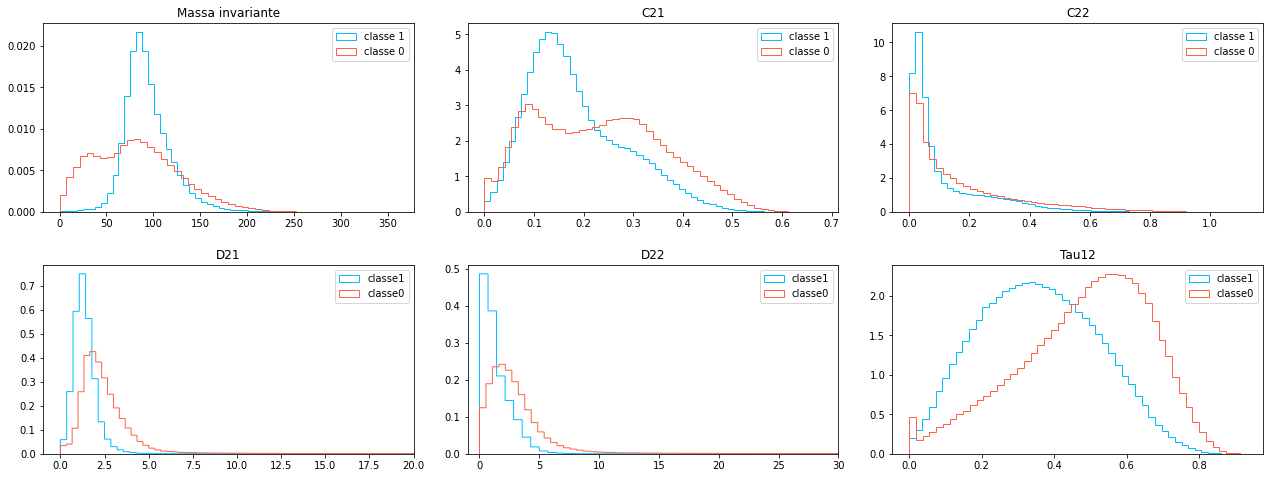

In [ ]:

class_1 = (label_hl[:,0]>=0.5)
class_0 = (label_hl[:,0]<0.5)
plt.figure(figsize=(18,7))
plt.subplot(2,3,1)
plt.hist(ds_hl[class_1,0], histtype='step', color='deepskyblue', density=True, label='classe 1', bins=50,)
plt.legend()
plt.hist(ds_hl[class_0,0], histtype='step', color='tomato', density=True, label='classe 0', bins=50)
plt.legend()
plt.title('Massa invariante')

plt.subplot(2,3,2)
plt.hist(ds_hl[class_1,1], histtype='step', color='deepskyblue', density=True, label='classe 1', bins=50)
plt.legend()
plt.hist(ds_hl[class_0,1], histtype='step', color='tomato', density=True, label='classe 0', bins=50)
plt.legend()
plt.title('C21')

plt.subplot(2,3,3)
plt.hist(ds_hl[class_1,2], histtype='step', color='deepskyblue', density=True, label='classe 1', bins=50,)
plt.legend()
plt.hist(ds_hl[class_0,2], histtype='step', color='tomato', density=True, label='classe 0', bins=50)
plt.legend()
plt.title('C22')

plt.subplot(2,3,4)
plt.hist(ds_hl[class_1,3], histtype='step', color='deepskyblue', density=True, label='classe1', bins=1000)
plt.legend()
plt.hist(ds_hl[class_0,3], histtype='step', color='tomato', density=True, label='classe0', bins=1000)
plt.legend()
plt.xlim(-1, 20)
plt.title('D21')

plt.subplot(2,3,5)
plt.hist(ds_hl[class_1,4], histtype='step', color='deepskyblue', density=True, label='classe1', bins=1000)
plt.legend()
plt.hist(ds_hl[class_0,4], histtype='step', color='tomato', density=True, label='classe0', bins=1000)
plt.legend()
plt.xlim(-1, 30)
plt.title('D22')

plt.subplot(2,3,6)

plt.hist(ds_hl[class_1,5], histtype='step', color='deepskyblue', density=True, label='classe1', bins=50,)
plt.legend()
plt.hist(ds_hl[class_0,5], histtype='step', color='tomato', density=True, label='classe0', bins=50)
plt.legend()
plt.title('Tau12')

plt.tight_layout(2)

plt.show()


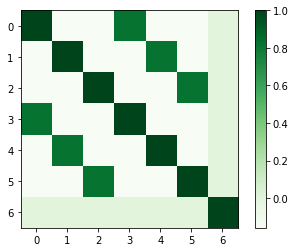

In [ ]:
plt.imshow(np.corrcoef(ds_hl.reshape(6,1000000), y=label_hl.reshape(1,1000000)), cmap='Greens')
plt.colorbar()

In [ ]:
###Normalizzo i dati

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
ds_hl_n = transformer.fit_transform(ds_hl)
test_ds_hl_n = transformer.transform(test_ds_hl)

In [ ]:
dataset = pd.DataFrame(ds_hl, columns = ['Mjet','C21','C22','D21','D22','Tau12'])
dataset.describe()

,Mjet,C21,C22,D21,D22,Tau12
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,87.978706,0.208040,0.143884,2.092321,2.464338,0.419801
std,37.284786,0.116360,0.160337,3.006981,4.936346,0.182466
min,-0.000106,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.784077,0.115212,0.030577,1.174518,0.792718,0.281599
50%,86.857101,0.187068,0.074081,1.648180,1.687215,0.426693
75%,108.366997,0.291522,0.210122,2.359470,2.987850,0.560514
max,359.757996,0.679628,1.119840,357.085999,714.007019,0.930558


In [ ]:
dataset.corr()

,Mjet,C21,C22,D21,D22,Tau12
Mjet,1.000000,0.708803,0.612380,-0.249339,-0.227632,0.174593
C21,0.708803,1.000000,0.918623,0.015417,0.039924,0.679634
C22,0.612380,0.918623,1.000000,0.038288,0.105991,0.565018
D21,-0.249339,0.015417,0.038288,1.000000,0.918346,0.177860
D22,-0.227632,0.039924,0.105991,0.918346,1.000000,0.209946
Tau12,0.174593,0.679634,0.565018,0.177860,0.209946,1.000000


In [ ]:
dataset_n = pd.DataFrame(ds_hl_n, columns = ['Mjet','C21','C22','D21','D22','Tau12'])

dataset_n.describe()

,Mjet,C21,C22,D21,D22,Tau12
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,-1.758091e-08,-3.645253e-09,1.163660e-07,1.339047e-08,1.062468e-08,4.107691e-08
std,9.996868e-01,9.998297e-01,9.998673e-01,9.994540e-01,9.994895e-01,9.998348e-01
min,-2.358742e+00,-1.787594e+00,-8.972681e-01,-6.953773e-01,-4.989364e-01,-2.300200e+00
25%,-5.413977e-01,-7.976533e-01,-7.065937e-01,-3.050191e-01,-3.384448e-01,-7.572265e-01
50%,-3.003562e-02,-1.802432e-01,-4.353063e-01,-1.475945e-01,-1.573474e-01,3.779406e-02
75%,5.466607e-01,7.172692e-01,4.130277e-01,8.880710e-02,1.059757e-01,7.710379e-01
max,7.286641e+00,4.052012e+00,6.085922e+00,1.179844e+02,1.440570e+02,2.798633e+00


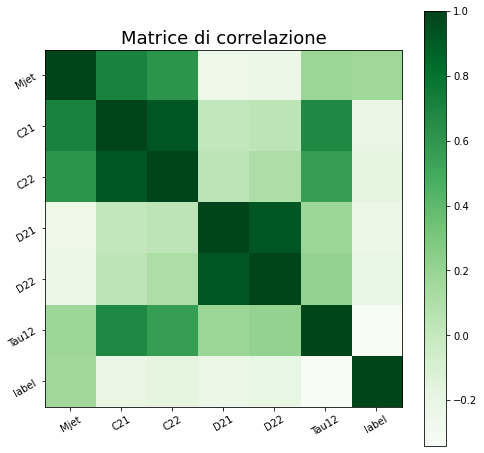

In [ ]:
dataset_n.corr()
dataset_tot = pd.concat([dataset_n, pd.DataFrame(label_hl, columns=['label'])], axis=1)
plt.figure(figsize=(8,8))
plt.imshow(dataset_tot.corr(), cmap='Greens')
plt.xticks(range(7), labels=dataset_tot.columns,rotation = 30)
plt.yticks(range(7), labels=dataset_tot.columns,rotation = 30)
plt.title('Matrice di correlazione', fontsize =18)
plt.colorbar()
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=200,
                              random_state=0)


forest.fit(dataset_n, label_hl.reshape(1000000,))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


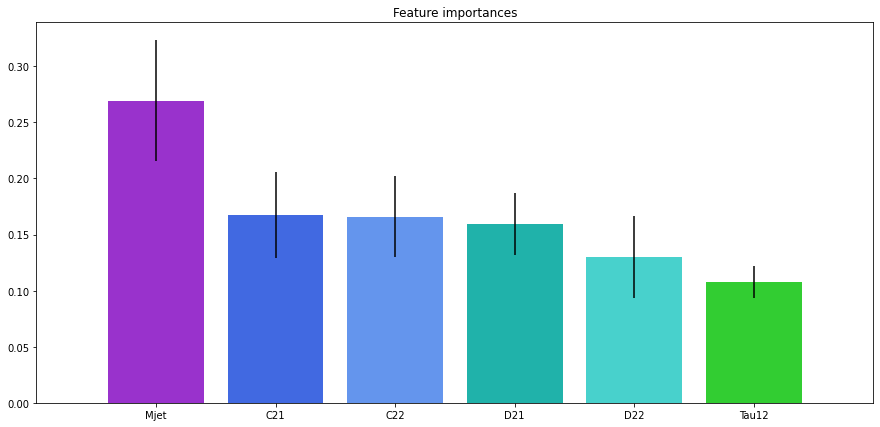

In [ ]:
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,7))
plt.title("Feature importances")
plt.bar(range(6), importances[indices], yerr=std[indices], align="center", color = ['darkorchid', 'royalblue','cornflowerblue',  'lightseagreen', 'mediumturquoise', 'limegreen'],tick_label = dataset_n.columns)

plt.xticks(range(6),dataset_n.columns)
plt.xlim([-1, 6])
plt.show()

[[ 1.00000000e+00 -3.38218045e-04  6.26646601e-04  5.20148389e-02
  -1.16385495e-03  2.58314958e-03 -1.36242805e-03]
 [-3.38218045e-04  1.00000000e+00  7.09935671e-04  2.87112842e-03
   5.20820127e-02  1.80847935e-03  2.29203659e-04]
 [ 6.26646601e-04  7.09935671e-04  1.00000000e+00  1.73237429e-03
   4.57501172e-04  5.03259843e-02  4.74539479e-04]
 [ 5.20148389e-02  2.87112842e-03  1.73237429e-03  1.00000000e+00
   2.37149449e-03  1.09907248e-03  6.68937208e-04]
 [-1.16385495e-03  5.20820127e-02  4.57501172e-04  2.37149449e-03
   1.00000000e+00 -4.02400155e-04 -8.87529402e-04]
 [ 2.58314958e-03  1.80847935e-03  5.03259843e-02  1.09907248e-03
  -4.02400155e-04  1.00000000e+00 -9.35592821e-05]
 [-1.36242805e-03  2.29203659e-04  4.74539479e-04  6.68937208e-04
  -8.87529402e-04 -9.35592821e-05  1.00000000e+00]]


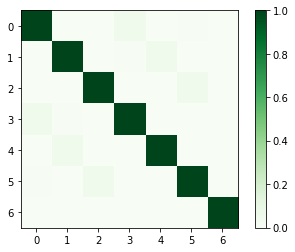

In [ ]:
plt.imshow(np.corrcoef(ds_hl_n.reshape(6,1000000), y=label_hl.reshape(1,1000000)), cmap='Greens')
plt.colorbar()
print(np.corrcoef(ds_hl_n.reshape(6,1000000), y=label_hl.reshape(1,1000000)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split
train_data_hl, val_data_hl, train_label_hl, val_label_hl = train_test_split(ds_hl, label_hl, test_size=0.2, shuffle = True , random_state=2312433123)

In [ ]:

BDT_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=49,), n_estimators = 100, learning_rate = 0.07)
BDT_clf.fit(train_data_hl, train_label_hl.reshape(len(train_data_hl),))


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=49,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [ ]:
acc = BDT_clf.score(train_data_hl, train_label_hl.reshape(len(train_data_hl)))
val_acc = BDT_clf.score(val_data_hl, val_label_hl.reshape(len(val_label_hl)))

print('49', acc, val_acc)


49 0.99995875 0.831775
